In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

link - https://www.kaggle.com/datasets/nicholasjhana/energy-consumption-generation-prices-and-weather


# Load the data

In [209]:
# load the data
df_energy = pd.read_csv('data/energy_dataset.csv')
df_weather = pd.read_csv('data/weather_features.csv')

# Inspect the data

## df_energy

In [210]:
print(df_energy.head())

                        time  generation biomass  \
0  2015-01-01 00:00:00+01:00               447.0   
1  2015-01-01 01:00:00+01:00               449.0   
2  2015-01-01 02:00:00+01:00               448.0   
3  2015-01-01 03:00:00+01:00               438.0   
4  2015-01-01 04:00:00+01:00               428.0   

   generation fossil brown coal/lignite  generation fossil coal-derived gas  \
0                                 329.0                                 0.0   
1                                 328.0                                 0.0   
2                                 323.0                                 0.0   
3                                 254.0                                 0.0   
4                                 187.0                                 0.0   

   generation fossil gas  generation fossil hard coal  generation fossil oil  \
0                 4844.0                       4821.0                  162.0   
1                 5196.0                       4755.

In [211]:
df_energy.shape

(35064, 29)

In [212]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [213]:
# time should be datetime not string
type(df_energy['time'][0])

str

- *'time'* should be changed to datetime, as it represents time.

## df_weather

In [214]:
print(df_weather.head())

                      dt_iso city_name     temp  temp_min  temp_max  pressure  \
0  2015-01-01 00:00:00+01:00  Valencia  270.475   270.475   270.475      1001   
1  2015-01-01 01:00:00+01:00  Valencia  270.475   270.475   270.475      1001   
2  2015-01-01 02:00:00+01:00  Valencia  269.686   269.686   269.686      1002   
3  2015-01-01 03:00:00+01:00  Valencia  269.686   269.686   269.686      1002   
4  2015-01-01 04:00:00+01:00  Valencia  269.686   269.686   269.686      1002   

   humidity  wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  \
0        77           1        62      0.0      0.0      0.0           0   
1        77           1        62      0.0      0.0      0.0           0   
2        78           0        23      0.0      0.0      0.0           0   
3        78           0        23      0.0      0.0      0.0           0   
4        78           0        23      0.0      0.0      0.0           0   

   weather_id weather_main weather_description weather_i

- temp is measured in Kelvin.
- *rain_1h, rain_3h, snow_3h, clouds_all* seem to have all zero values.

In [215]:
df_weather.shape

(178396, 17)

In [216]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

- df_weather has no null values.

# Missing Values 

## df_energy

In [217]:
df_energy.isnull().sum()

time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                              

- All the records for *'generation hydro pumped storage aggregated'* & *'forecast wind offshore eday ahead'* contain null values. Therefore, the entire columns must be dropped.

In [218]:
# count the frequency of missing values in each row (i.e. how many columns are empty)
print(df_energy.isnull().sum(axis=1).value_counts())

2     35017
3        29
23       12
22        6
Name: count, dtype: int64


- Almost all the rows, have 2 null columns.

## df_weather

In [219]:
df_weather.isnull().sum()

dt_iso                 0
city_name              0
temp                   0
temp_min               0
temp_max               0
pressure               0
humidity               0
wind_speed             0
wind_deg               0
rain_1h                0
rain_3h                0
snow_3h                0
clouds_all             0
weather_id             0
weather_main           0
weather_description    0
weather_icon           0
dtype: int64

- No missing values in df_weather.

# Invalid Data

## df_energy

In [220]:
# get the unique values count for each column
for column in df_energy.columns:
    print(df_energy[column].value_counts())
    print('-'*20)

time
2015-01-01 00:00:00+01:00    1
2017-09-01 03:00:00+02:00    1
2017-08-31 21:00:00+02:00    1
2017-08-31 22:00:00+02:00    1
2017-08-31 23:00:00+02:00    1
                            ..
2016-05-01 19:00:00+02:00    1
2016-05-01 18:00:00+02:00    1
2016-05-01 17:00:00+02:00    1
2016-05-01 16:00:00+02:00    1
2018-12-31 23:00:00+01:00    1
Name: count, Length: 35064, dtype: int64
--------------------
generation biomass
361.0    321
362.0    318
351.0    310
358.0    305
359.0    305
        ... 
101.0      1
589.0      1
174.0      1
175.0      1
168.0      1
Name: count, Length: 423, dtype: int64
--------------------
generation fossil brown coal/lignite
0.0      10517
663.0      165
664.0      124
595.0      108
657.0      103
         ...  
144.0        1
39.0         1
87.0         1
41.0         1
35.0         1
Name: count, Length: 956, dtype: int64
--------------------
generation fossil coal-derived gas
0.0    35046
Name: count, dtype: int64
--------------------
generation fo

- Columns of *'generation fossil coal-derived gas', 'generation fossil oil shale', 'generation fossil peat', 'generation geothermal', 'generation marine', 'generation wind offshore'* have all record values as zero.

In [221]:
# count the negative values for each numeric column
print((df_energy.select_dtypes(include='number') < 0).sum())

generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil coal-derived gas             0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation fossil oil shale                    0
generation fossil peat                         0
generation geothermal                          0
generation hydro pumped storage aggregated     0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation marine                              0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind offshore                       0
generation wind onsh

- No columns contain negative values.

## df_weather

In [222]:
# get the unique values count for each column
for column in df_weather.columns:
    print(df_weather[column].value_counts())
    print('-'*20)

dt_iso
2015-10-01 02:00:00+02:00    10
2017-09-30 02:00:00+02:00    10
2016-09-30 02:00:00+02:00    10
2018-09-30 02:00:00+02:00    10
2018-02-28 09:00:00+01:00    10
                             ..
2016-05-06 17:00:00+02:00     5
2016-05-06 15:00:00+02:00     5
2016-05-06 14:00:00+02:00     5
2016-05-06 13:00:00+02:00     5
2018-12-31 23:00:00+01:00     5
Name: count, Length: 35064, dtype: int64
--------------------
city_name
Madrid        36267
Bilbao        35951
Seville       35557
 Barcelona    35476
Valencia      35145
Name: count, dtype: int64
--------------------
temp
286.150000    2105
287.150000    2061
289.150000    2041
288.150000    1981
285.150000    1870
              ... 
270.914000       1
272.171000       1
276.308656       1
279.189344       1
280.150500       1
Name: count, Length: 20743, dtype: int64
--------------------
temp_min
288.150000    6028
286.150000    5706
287.150000    5628
289.150000    5582
285.150000    5417
              ... 
279.753312       1
281.

- weather_id seems to match with weather_description.
- weather_icon represents the id of the display icon used.

In [223]:
# count the zero values for each numeric column
print((df_weather.select_dtypes(include='number') < 0).sum())

temp          0
temp_min      0
temp_max      0
pressure      0
humidity      0
wind_speed    0
wind_deg      0
rain_1h       0
rain_3h       0
snow_3h       0
clouds_all    0
weather_id    0
dtype: int64


- no columns with negative values in df_weather.

In [224]:
print((df_weather.select_dtypes(include='number') == 0).sum()/df_weather.shape[0])

temp          0.000000
temp_min      0.000000
temp_max      0.000000
pressure      0.000011
humidity      0.000353
wind_speed    0.103646
wind_deg      0.139689
rain_1h       0.891320
rain_3h       0.989602
snow_3h       0.998503
clouds_all    0.460739
weather_id    0.000000
dtype: float64


- almost all columns in rain_1h, rain_3h, snow_3h contain >89% zero values.
- clouds_all having zero value means clear sky. (not dropping for now)

# Data Preparation

## df_energy

In [225]:
# drop columns with all null values
columns_to_drop = ['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead']
df_energy.drop(columns_to_drop, axis=1, inplace=True)

In [226]:
df_energy.isnull().sum()

time                                            0
generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil coal-derived gas             18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation fossil oil shale                    18
generation fossil peat                         18
generation geothermal                          18
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation marine                              19
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19
generation wind offshore                       18


In [227]:
# count the frequency of missing values in each row (i.e. how many columns are empty)
print(df_energy.isnull().sum(axis=1).value_counts())

0     35017
1        29
21       12
20        6
Name: count, dtype: int64


In [228]:
# drop columns with all zero values
columns_to_drop = ['generation fossil coal-derived gas', 'generation fossil oil shale', 'generation fossil peat', 
                   'generation geothermal', 'generation marine', 'generation wind offshore' ]
df_energy.drop(columns_to_drop, axis=1, inplace=True)

In [229]:
# count the frequency of missing values in each row (i.e. how many columns are empty)
print(df_energy.isnull().sum(axis=1).value_counts())

0     35018
1        28
15       12
14        6
Name: count, dtype: int64


In [230]:
# remove the rows having null values
df_energy = df_energy.dropna()

In [231]:
# count the frequency of missing values in each row (i.e. how many columns are empty)
print(df_energy.isnull().sum(axis=1).value_counts())

0    35018
Name: count, dtype: int64


In [232]:
df_energy['time']

0        2015-01-01 00:00:00+01:00
1        2015-01-01 01:00:00+01:00
2        2015-01-01 02:00:00+01:00
3        2015-01-01 03:00:00+01:00
4        2015-01-01 04:00:00+01:00
                   ...            
35059    2018-12-31 19:00:00+01:00
35060    2018-12-31 20:00:00+01:00
35061    2018-12-31 21:00:00+01:00
35062    2018-12-31 22:00:00+01:00
35063    2018-12-31 23:00:00+01:00
Name: time, Length: 35018, dtype: object

In [233]:
# Convert the column from string to datetime
df_energy['time'] = pd.to_datetime(df_energy['time'], utc=True) # datetime values that are explicitly in UTC

- We have taken care of all the missing and invalid datatypes and values. 

## df_weather

In [234]:
# 1. drop the columns with almost all zero values and icon
df_weather.drop(['rain_1h', 'rain_3h', 'snow_3h', 'weather_icon'], axis=1, inplace=True)

In [235]:
# count the frequency of missing values in each row (i.e. how many columns are empty)
print(sum((df_weather.select_dtypes(include='number') == 0).sum(axis=1)==1))

# get the indices
indices = df_weather.index[(df_weather.select_dtypes(include='number') == 0).sum(axis=1)==1]
temp = df_weather.iloc[indices]
# count the zero values for each numeric column
print((temp.select_dtypes(include='number') == 0).sum())

77375
temp              0
temp_min          0
temp_max          0
pressure          0
humidity         22
wind_speed     4138
wind_deg       7454
clouds_all    65761
weather_id        0
dtype: int64


In [236]:
df_weather.columns

Index(['dt_iso', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed', 'wind_deg', 'clouds_all', 'weather_id',
       'weather_main', 'weather_description'],
      dtype='object')

In [237]:
for i in df_weather.columns:
    print(i,': ',type(df_weather[i][0]))

dt_iso :  <class 'str'>
city_name :  <class 'str'>
temp :  <class 'numpy.float64'>
temp_min :  <class 'numpy.float64'>
temp_max :  <class 'numpy.float64'>
pressure :  <class 'numpy.int64'>
humidity :  <class 'numpy.int64'>
wind_speed :  <class 'numpy.int64'>
wind_deg :  <class 'numpy.int64'>
clouds_all :  <class 'numpy.int64'>
weather_id :  <class 'numpy.int64'>
weather_main :  <class 'str'>
weather_description :  <class 'str'>


In [238]:
# 2. Convert the column from string to datetime
df_weather['dt_iso'] = pd.to_datetime(df_weather['dt_iso'], utc=True)

In [239]:
# 3. trim the string values in city_name
print(df_weather['city_name'].value_counts())
df_weather['city_name'] = df_weather['city_name'].str.strip()
print(df_weather['city_name'].value_counts())

city_name
Madrid        36267
Bilbao        35951
Seville       35557
 Barcelona    35476
Valencia      35145
Name: count, dtype: int64
city_name
Madrid       36267
Bilbao       35951
Seville      35557
Barcelona    35476
Valencia     35145
Name: count, dtype: int64


# Merge two datasets

In [240]:
df_energy.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [241]:
df_weather.columns

Index(['dt_iso', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed', 'wind_deg', 'clouds_all', 'weather_id',
       'weather_main', 'weather_description'],
      dtype='object')

In [242]:
df_weather['dt_iso']

0        2014-12-31 23:00:00+00:00
1        2015-01-01 00:00:00+00:00
2        2015-01-01 01:00:00+00:00
3        2015-01-01 02:00:00+00:00
4        2015-01-01 03:00:00+00:00
                    ...           
178391   2018-12-31 18:00:00+00:00
178392   2018-12-31 19:00:00+00:00
178393   2018-12-31 20:00:00+00:00
178394   2018-12-31 21:00:00+00:00
178395   2018-12-31 22:00:00+00:00
Name: dt_iso, Length: 178396, dtype: datetime64[ns, UTC]

In [243]:
# Find duplicate rows in the DataFrame
duplicates = df_weather.duplicated()
duplicate_rows = df_weather[duplicates]
duplicate_rows.shape

(21, 13)

In [244]:
df_weather['city_name'].value_counts()

city_name
Madrid       36267
Bilbao       35951
Seville      35557
Barcelona    35476
Valencia     35145
Name: count, dtype: int64

- df_energy and df_weather cannot be merged yet. There are many duplicates for every city in df_weather and we should drop them and see if their number of rows match.

In [245]:
df_weather.drop_duplicates(subset=['dt_iso', 'city_name'], keep='first', inplace=True)
df_weather['city_name'].value_counts()

city_name
Valencia     35064
Madrid       35064
Bilbao       35064
Barcelona    35064
Seville      35064
Name: count, dtype: int64

In [246]:
df_weather.duplicated(subset=['dt_iso', 'city_name'], keep='first').sum()

0

- we have zero duplicates in df_weather

In [247]:
# join the two datasets on time and date_iso
merged_df = pd.merge(df_energy, df_weather, left_on='time', right_on='dt_iso', how='inner')

In [248]:
pd.set_option('display.max_columns', None) 
print(merged_df.head())

                       time  generation biomass  \
0 2014-12-31 23:00:00+00:00               447.0   
1 2014-12-31 23:00:00+00:00               447.0   
2 2014-12-31 23:00:00+00:00               447.0   
3 2014-12-31 23:00:00+00:00               447.0   
4 2014-12-31 23:00:00+00:00               447.0   

   generation fossil brown coal/lignite  generation fossil gas  \
0                                 329.0                 4844.0   
1                                 329.0                 4844.0   
2                                 329.0                 4844.0   
3                                 329.0                 4844.0   
4                                 329.0                 4844.0   

   generation fossil hard coal  generation fossil oil  \
0                       4821.0                  162.0   
1                       4821.0                  162.0   
2                       4821.0                  162.0   
3                       4821.0                  162.0   
4          

In [249]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175090 entries, 0 to 175089
Data columns (total 34 columns):
 #   Column                                       Non-Null Count   Dtype              
---  ------                                       --------------   -----              
 0   time                                         175090 non-null  datetime64[ns, UTC]
 1   generation biomass                           175090 non-null  float64            
 2   generation fossil brown coal/lignite         175090 non-null  float64            
 3   generation fossil gas                        175090 non-null  float64            
 4   generation fossil hard coal                  175090 non-null  float64            
 5   generation fossil oil                        175090 non-null  float64            
 6   generation hydro pumped storage consumption  175090 non-null  float64            
 7   generation hydro run-of-river and poundage   175090 non-null  float64            
 8   generation hyd

In [250]:
# drop duplicate dt_iso column
merged_df.drop(['dt_iso'], axis=1, inplace=True)

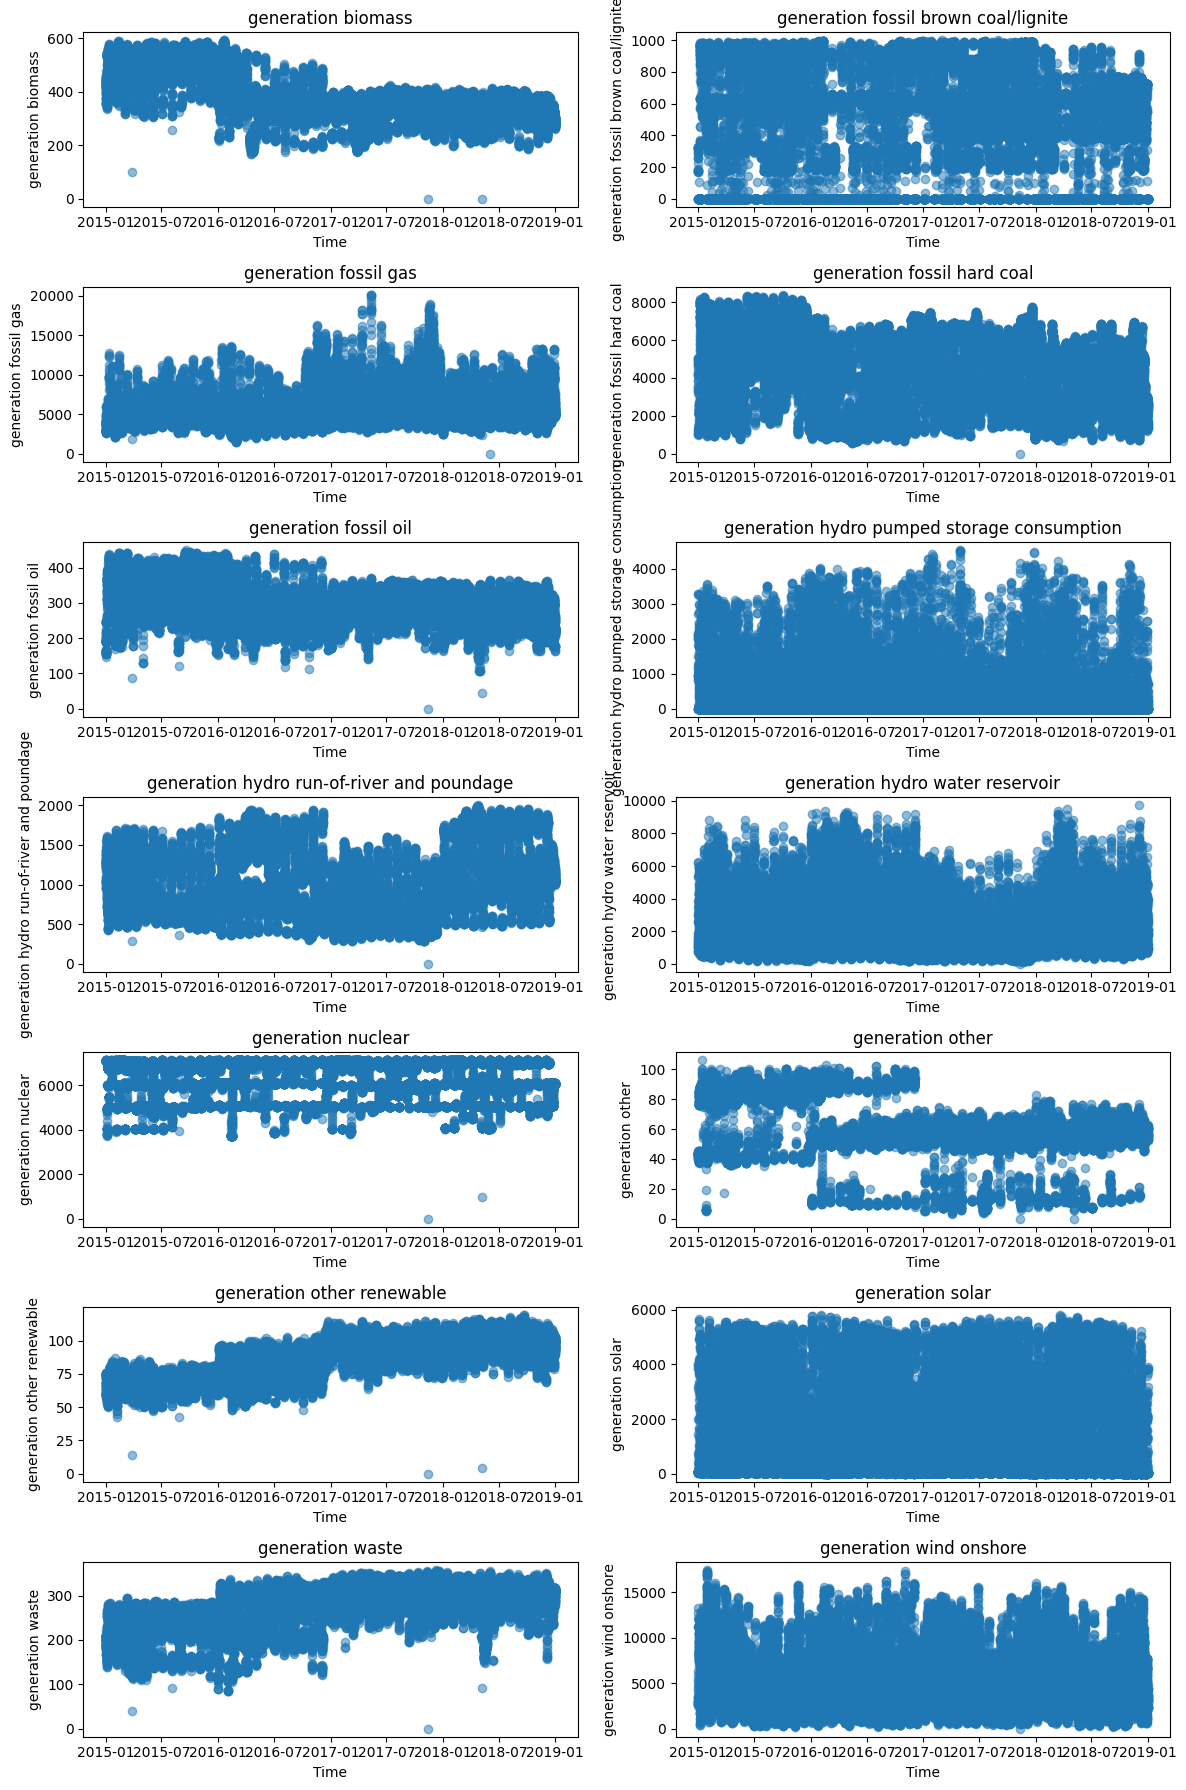

In [251]:
# Scatter plots for Generation
generation_columns = [col for col in df_energy.columns if 'generation' in col]

num_plots = len(generation_columns)
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(12, 18))

# Step 4: Iterate through the generation columns and create scatter plots
for i, column in enumerate(generation_columns):
    row = i // 2
    col = i % 2
    axes[row, col].scatter(df_energy['time'], df_energy[column], marker='o', alpha=0.5)
    axes[row, col].set_title(column)
    axes[row, col].set_xlabel('Time')
    axes[row, col].set_ylabel(column)

# Step 5: Adjust the layout and spacing of subplots
plt.tight_layout()

# Step 6: Display the plot
plt.show()

- most of the graphs are unclear, might be due to hourly timestamps

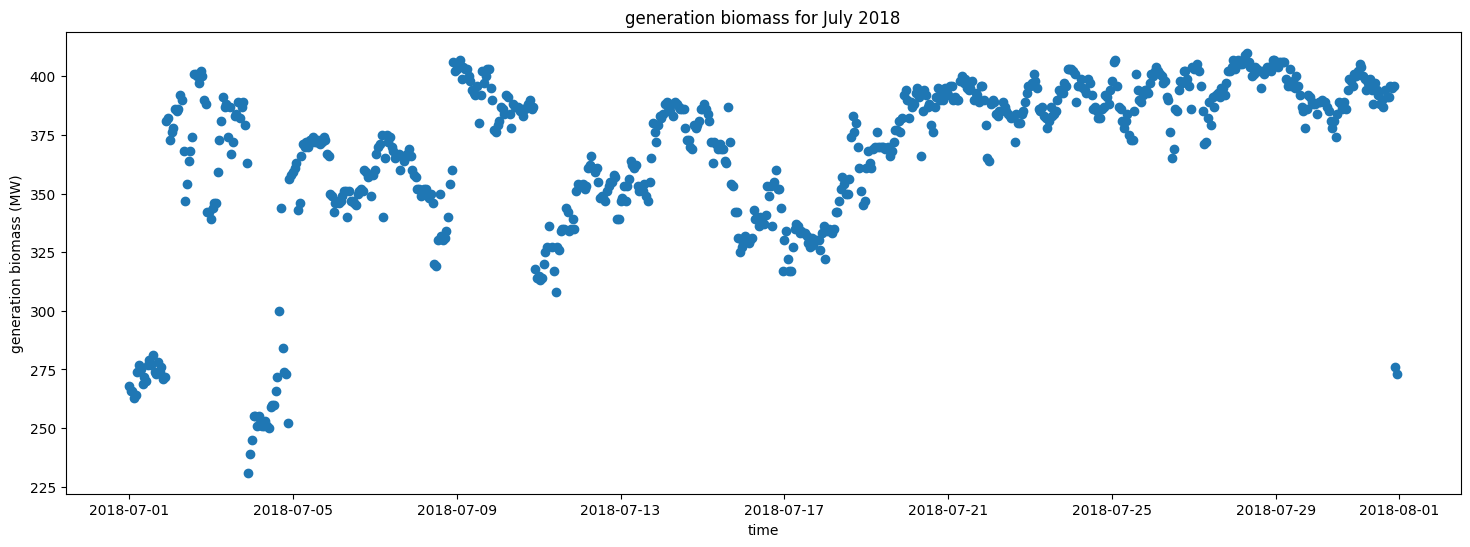

In [252]:
filtered_df = df_energy[(df_energy['time'].dt.year == 2018) & (df_energy['time'].dt.month == 7)]

plt.figure(figsize=(18,6))
plt.scatter(filtered_df['time'], filtered_df['generation biomass'])
plt.title('generation biomass for July 2018')
plt.xlabel('time')
plt.ylabel('generation biomass (MW)')
plt.show()

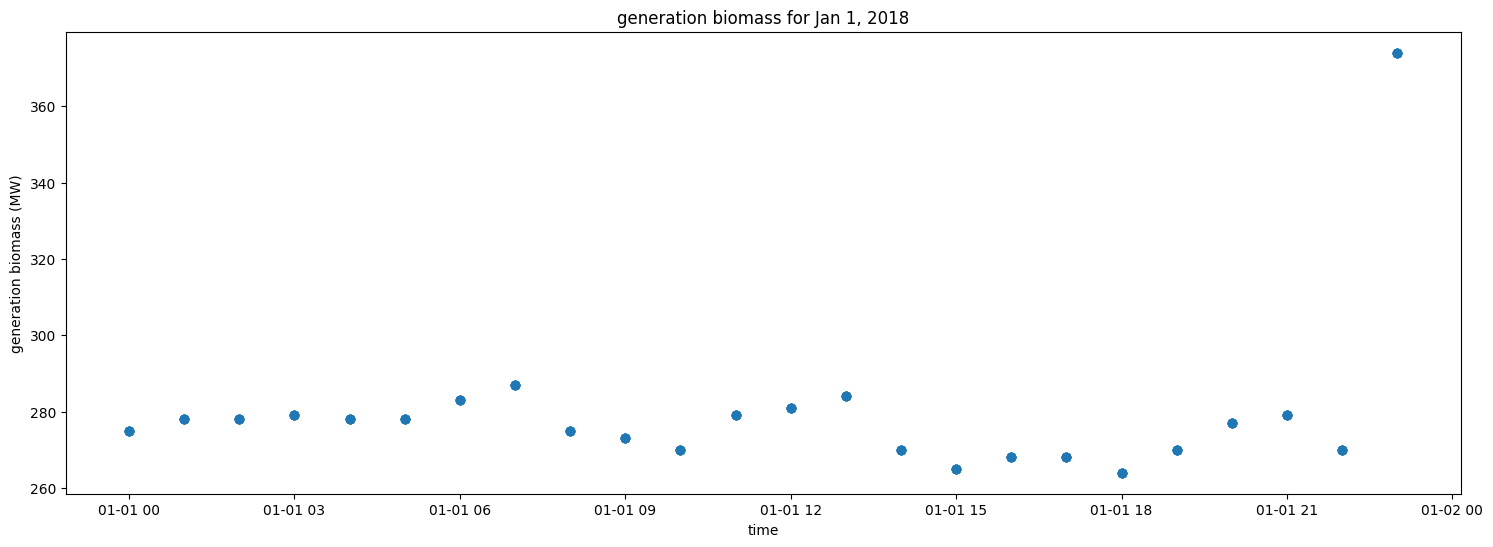

In [253]:
specific_date = pd.to_datetime('2018-01-01')
filtered_df = merged_df[merged_df['time'].dt.date == specific_date.date()]

plt.figure(figsize=(18,6))
plt.scatter(filtered_df['time'], filtered_df['generation biomass'])
plt.title('generation biomass for Jan 1, 2018')
plt.xlabel('time')
plt.ylabel('generation biomass (MW)')
plt.show()

- we can see hourly forecast for Jan 1, 2018